** Note :

   Efficient frontier: https://en.wikipedia.org/wiki/Efficient_frontier
    
   Modern portfolio theory:_ https://en.wikipedia.org/wiki/Modern_portfolio_theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [4]:
from pandas_datareader import data as pdr
from tqdm import tqdm,trange
stock_list = ['BAY','BANPU','CBG','ESSO','GJS']
stock_data = []
stock_name = []
for quote in tqdm(stock_list):
    try:
        stock_data.append(pdr.get_data_yahoo(f'{quote}.BK', start='2014-01-01', end='2020-4-30'))
        stock_name.append(quote)
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.80s/it]


In [5]:
print(stock_name)

['BAY', 'BANPU', 'CBG', 'ESSO', 'GJS']


In [6]:
BAY = stock_data[0] 
BANPU = stock_data[1]
CBG = stock_data[2]
ESSO = stock_data[3]
GJS = stock_data[4]

In [7]:
BAY.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,30.25,29.75,29.75,29.75,1894300.0,24.682831


In [13]:
stock = pd.concat([BAY['Adj Close'], BANPU['Adj Close'], CBG['Adj Close'], ESSO['Adj Close'], GJS['Adj Close']], axis = 1)
stock.columns = ['BAY', 'BANPU', 'CBG', 'ESSO', 'GJS']
stock.head(1)

,BAY,BANPU,CBG,ESSO,GJS
Date,,,,,
2014-01-02,24.682831,13.7892,NaN,5.361263,0.6


In [14]:
log_ret = np.log(stock/stock.shift(1))

In [15]:
log_ret.head(5)

,BAY,BANPU,CBG,ESSO,GJS
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.000000,-0.055056,NaN,-0.044060,-0.182322
2014-01-06,0.008368,-0.048321,NaN,-0.027399,0.000000
2014-01-07,0.000000,0.029271,NaN,0.054067,0.182322
2014-01-08,0.000000,0.019050,NaN,-0.035718,0.000000


In [19]:
np.random.seed(50)
num_ports = 10000
all_weight = np.zeros((num_port, len(stock.columns)))
ret_arr = np.zeros(num_port)
vol_arr = np.zeros(num_port)
sharpe_arr = np.zeros(num_port)

for x in range(num_ports):
    # Weights
    weight = np.array(np.random.random(5))
    weight = weight/np.sum(weight)
    
    # Save weights
    all_weight[x,:] = weight
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weight*252)) # Why do we multiply by 252 ? It is Annualized return.
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight))) # Annualized volatility
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [20]:
print('Max sharpe ratio in array:{}'.format(sharpe_arr.max()))
print("It is a location in thr array:{}".format(sharpe_arr.argmax()))

Max sharpe ratio in array:0.3352813487799872
It is a location in thr array:4063


In [21]:
print(all_weight[4063,:]*100)

[ 0.98990761 13.54263324 81.61815129  1.44165582  2.40765204]


In [87]:
# check sum
0.00989908+ 0.13542633+ 0.81618151+ 0.01441656 +0.02407652

1.0

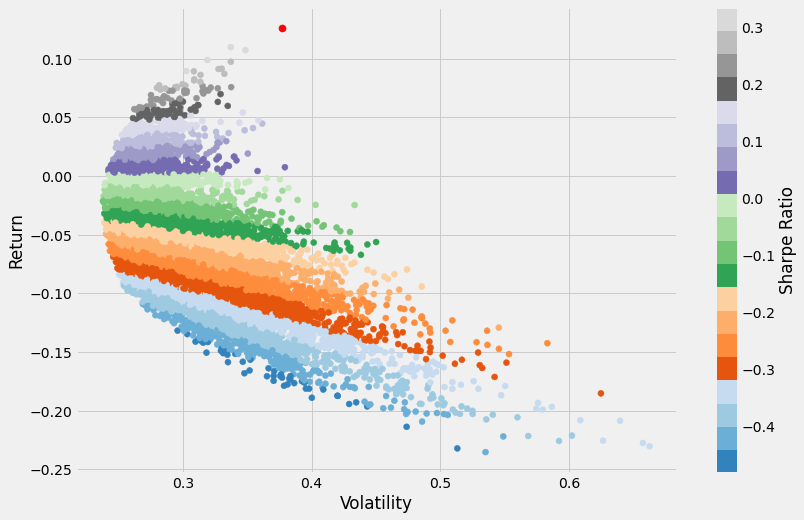

In [22]:
#max of mean and sd
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='tab20c')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()